In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ipl2024 Matches.csv')
df.tail(10)

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
64,65,"May 15,2024",Rajasthan,Punjab,Rajasthan,Bat,144,9,145,5,Punjab,Sam Curran,Sam Curran,Rahul Chahar
65,66,"May 16,2024",Hyderabad,Gujarat,No Toss,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN
66,67,"May 17,2024",Lucknow,Mumbai,Mumbai,Field,214,6,196,6,Lucknow,Nicholas Pooran,Nicholas Pooran,Nuwan Thushara
67,68,"May 18,2024",Banglore,Chennai,Chennai,Field,218,5,191,7,Banglore,Faf du Plessis,Rachin Ravindra,Yash Dayal
68,69,"May 19,2024",Punjab,Hyderabad,Punjab,Bat,214,5,215,6,Hyderabad,Abhishek Sharma,Prabhsimran Singh,T Natarajan
69,70,"May 19,2024",Rajasthan,Kolkata,Kolkata,NaN,0,0,0,0,Abandoned,NaN,NaN,NaN
70,71,"May 21,2024",Hyderabad,Kolkata,Hyderabad,Bat,159,10,164,2,Kolkata,Mitchell Starc,Shreyas Iyer,Mitchell Starc
71,72,"May 22,2024",Banglore,Rajasthan,Rajasthan,Field,172,8,174,6,Rajasthan,Ravichandran Ashwin,Yashasvi Jaiswal,Avesh Khan
72,73,"May 24,2024",Hyderabad,Rajasthan,Rajasthan,Field,175,9,139,7,Hyderabad,Shahbaz Ahmed,Dhruv Jurel,Shahbaz Ahmed
73,74,"May 26,2024",Hyderabad,Kolkata,Hyderabad,Bat,113,10,114,2,Kolkata,Mitchell Starc,Venkatesh Iyer,Andre Russell


In [3]:
#Show the first 10 rows of the dataset.

df.head(10)

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah
5,6,"March 25,2024",Punjab,Banglore,Banglore,Field,176,6,178,6,Banglore,Virat Kohli,Virat Kohli,Harpreet Brar
6,7,"March 26,2024",Chennai,Gujarat,Gujarat,Field,206,6,143,8,Chennai,Shivam Dube,Shivam Dube,Tushar Deshpande
7,8,"March 27,2024",Hyderabad,Mumbai,Mumbai,Field,277,3,246,5,Hyderabad,Abhishek Sharma,Heinrich Klaasen,Pat Cummins
8,9,"March 28,2024",Rajasthan,Delhi,Delhi,Field,185,5,173,5,Rajasthan,Riyan Parag,Riyan Parag,Yuzvendra Chahal
9,10,"March 29,2024",Banglore,Kolkata,Kolkata,Field,182,6,186,3,Kolkata,Sunil Narine,Virat Kohli,Andre Russell


In [15]:
#Find the total number of matches played in IPL 2024.
total_matches = len(df)
print(total_matches)

74


In [4]:
#Count how many matches each team played as team1 and team2.

team1_count = df['team1'].value_counts()
team2_count = df['team2'].value_counts()

total_matches = team1_count.add(team2_count, fill_value= 0)
print(total_matches)

Banglore     15
Chennai      14
Delhi        14
Gujarat      14
Hyderabad    17
Kolkata      16
Lucknow      14
Mumbai       14
Punjab       14
Rajasthan    16
Name: count, dtype: int64


In [5]:
#Find the matches where runs scored were more than 200.

high_scoring_matches = df[(df['first_score'] >= 200) | (df['second_score'] >= 200)]

print(high_scoring_matches[['team1', 'team2', 'first_score', 'second_score']])

        team1      team2  first_score  second_score
2     Kolkata  Hyderabad          208           204
6     Chennai    Gujarat          206           143
7   Hyderabad     Mumbai          277           246
15    Kolkata      Delhi          272           166
16    Gujarat     Punjab          199           200
19     Mumbai      Delhi          234           205
28    Chennai     Mumbai          206           186
29  Hyderabad   Banglore          187           262
30    Kolkata  Rajasthan          223           224
34  Hyderabad      Delhi          266           199
35    Kolkata   Banglore          222           221
38    Chennai    Lucknow          210           213
39      Delhi    Gujarat          224           220
40   Banglore  Hyderabad          206           171
41    Kolkata     Punjab          261           262
42      Delhi     Mumbai          257           247
44    Gujarat   Banglore          200           206
45    Chennai  Hyderabad          212           134
49  Hyderaba

In [6]:
#Replace missing values in player_of_the_match with "Unknown".

df['player_of_the_match'].isnull().sum()

np.int64(3)

In [7]:
df['player_of_the_match'] = df['player_of_the_match'].fillna("Unknown")

In [8]:
#Find the top 5 players who won the most player_of_the_match awards.

top5 = df[ df['player_of_the_match'] !="Unknown"] ['player_of_the_match'].value_counts().head(5)
top5

player_of_the_match
Sunil Narine       3
Abhishek Sharma    3
Travis Head        3
Sam Curran         2
Ravindra Jadeja    2
Name: count, dtype: int64

In [9]:
#Calculate the average first innings score.
df['first_score'].mean()

np.float64(180.55405405405406)

In [10]:
def calculate_margin(x):

    if x['winner'] == 'Abandoned' or x['winner'] == 'No Result':
        return None
        
    elif x['first_score'] > x['second_score']:
        return x['first_score'] - x['second_score']
    else:
        return 10 - x['second_wkts']


def calculate_wintype(x):
    
    if x['winner'] == 'Abandoned' or x['winner'] == 'No Result':
        return None
    elif x['first_score'] > x['second_score']:
        return "Runs"
    else:
        return "Wickets"

df['win_margin'] = df.apply(calculate_margin, axis=1)
df['win_type'] = df.apply(calculate_wintype, axis = 1)

In [11]:
df.tail(5)

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts,win_margin,win_type
69,70,"May 19,2024",Rajasthan,Kolkata,Kolkata,NaN,0,0,0,0,Abandoned,Unknown,NaN,NaN,NaN,None
70,71,"May 21,2024",Hyderabad,Kolkata,Hyderabad,Bat,159,10,164,2,Kolkata,Mitchell Starc,Shreyas Iyer,Mitchell Starc,8.0,Wickets
71,72,"May 22,2024",Banglore,Rajasthan,Rajasthan,Field,172,8,174,6,Rajasthan,Ravichandran Ashwin,Yashasvi Jaiswal,Avesh Khan,4.0,Wickets
72,73,"May 24,2024",Hyderabad,Rajasthan,Rajasthan,Field,175,9,139,7,Hyderabad,Shahbaz Ahmed,Dhruv Jurel,Shahbaz Ahmed,36.0,Runs
73,74,"May 26,2024",Hyderabad,Kolkata,Hyderabad,Bat,113,10,114,2,Kolkata,Mitchell Starc,Venkatesh Iyer,Andre Russell,8.0,Wickets


In [12]:
#Find the match with the highest win margin (by runs).

runs_win = df[df['win_type'] == 'Runs']

max_runs_margin = runs_win['win_margin'].max()
print("Highest win margin (by runs):", max_runs_margin)

match = runs_win[runs_win['win_margin'] == max_runs_margin]
print(match[['team1', 'team2', 'first_score', 'second_score', 'win_margin', 'win_type']])


Highest win margin (by runs): 106.0
      team1  team2  first_score  second_score  win_margin win_type
15  Kolkata  Delhi          272           166       106.0     Runs


In [13]:
#Find the match with the highest win margin by wickets.

wicket_win = df[df['win_type'] == 'Wickets']

max_wicket_margin = wicket_win['win_margin'].max()
print("Highest win margin (by wickets):", max_wicket_margin)
 
match = wicket_win[wicket_win['win_margin'] == max_wicket_margin]
print(match[['team1', 'team2', 'first_score', 'second_score', 'win_margin', 'win_type']])


Highest win margin (by wickets): 10.0
      team1      team2  first_score  second_score  win_margin win_type
56  Lucknow  Hyderabad          165           167        10.0  Wickets


In [15]:
#Create a new column called result like we did → "20 Runs" / "7 Wickets".

def make_result(row):
    if pd.isna(row['win_margin']) or pd.isna(row['win_type']):
        return None
    return f"{int(row['win_margin'])} {row['win_type']}"
        
    
df['result'] = df.apply(make_result, axis = 1)

In [16]:
df.head(5)

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts,win_margin,win_type,result
0,1,"March 22,2024",Banglore,Chennai,Banglore,Bat,173,6,176,4,Chennai,Mustafizur Rahman,Anuj Rawat,Mustafizur Rahman,6.0,Wickets,6 Wickets
1,2,"March 23,2024",Delhi,Punjab,Punjab,Field,174,9,177,6,Punjab,Sam Curran,Sam Curran,Kuldeep Yadav,4.0,Wickets,4 Wickets
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan,4.0,Runs,4 Runs
3,4,"March 24,2024",Rajasthan,Lucknow,Rajasthan,Bat,193,4,173,6,Rajasthan,Sanju Samson,Sanju Samson,Trent Boult,20.0,Runs,20 Runs
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah,6.0,Runs,6 Runs


In [17]:
#Group matches by winner and find the number of matches won by each team.

each_team_wins = df [df['winner'] != 'Abandoned']['winner'].value_counts()
each_team_wins

winner
Kolkata      11
Rajasthan     9
Hyderabad     9
Chennai       7
Delhi         7
Banglore      7
Lucknow       7
Punjab        5
Gujarat       5
Mumbai        4
Name: count, dtype: int64

In [18]:
#Find how many matches were decided in the last over (e.g., win by ≤ 6 runs or win by ≤ 1 wicket).

def closeMatches(x):
    
    if x['win_margin'] <= 6 and x['win_type'] == 'Runs':
        return "Last Over (Runs)"
        
    elif x['win_margin'] <= 1 and x['win_type'] == 'Wickets':
        return "Last Over (Wickets)"

    else:
        return None

df['close_match'] = df.apply(closeMatches, axis = 1)

In [19]:
df['close_match'].notnull().sum()

np.int64(6)

In [20]:
close_matches_details = df [df['close_match'].notnull()]
close_matches_details 

,id,date,team1,team2,toss_winner,decision,first_score,first_wkts,second_score,second_wkts,winner,player_of_the_match,most_runs,most_wkts,win_margin,win_type,result,close_match
2,3,"March 23,2024",Kolkata,Hyderabad,Hyderabad,Field,208,7,204,7,Kolkata,Andre Russell,Andre Russell,T Natarajan,4.0,Runs,4 Runs,Last Over (Runs)
4,5,"March 24,2024",Gujarat,Mumbai,Mumbai,Field,168,6,162,9,Gujarat,Sai Sudharsan,Dewald Brevis,Jasprit Bumrah,6.0,Runs,6 Runs,Last Over (Runs)
22,23,"April 9,2024",Hyderabad,Punjab,Punjab,Field,182,9,180,6,Hyderabad,Nitish Kumar Reddy,Nitish Kumar Reddy,Arshdeep Singh,2.0,Runs,2 Runs,Last Over (Runs)
35,36,"April 21,2024",Kolkata,Banglore,Banglore,Field,222,6,221,10,Kolkata,Andre Russell,Will Jacks,Andre Russell,1.0,Runs,1 Runs,Last Over (Runs)
39,40,"April 24,2024",Delhi,Gujarat,Gujarat,Field,224,4,220,8,Delhi,Rishabh Pant,Rishabh Pant,Sandeep Warrier,4.0,Runs,4 Runs,Last Over (Runs)
49,50,"May 2,2024",Hyderabad,Rajasthan,Hyderabad,Bat,201,3,200,7,Hyderabad,Bhuvneshwar Kumar,Riyan Parag,Bhuvneshwar Kumar,1.0,Runs,1 Runs,Last Over (Runs)


In [21]:
#Find which team won the most matches while chasing.

def chasingWins(x):
    if x['win_type'] == 'Wickets':
        return x['winner']
    else:
        return None

df['chase'] = df.apply(chasingWins, axis = 1)


In [22]:
df['chase'].value_counts().idxmax()

'Rajasthan'

In [23]:
#Find which team defended a score successfully the most times.

def defendedScore(x):
    if x['win_type'] == 'Runs':
        return x['winner']
    else:
        return None

df['defended_score'] = df.apply(defendedScore, axis = 1)

In [24]:
df['defended_score'].value_counts().idxmax()

'Kolkata'

In [27]:
#Create a pivot table showing teams vs number of wins by runs and wickets.

pivot_df = pd.pivot_table(
    df, 
    index="team1",                   # index as team1 (winning team)
    columns="win_type",              # separate columns for runs/wickets
    values="win_margin",             # values to aggregate
    aggfunc="count",                 # count how many wins by type
    fill_value=0                     # replace NaN with 0
)

print(pivot_df)


win_type   Runs  Wickets
team1                   
Banglore      4        5
Chennai       4        4
Delhi         5        2
Gujarat       2        4
Hyderabad     5        5
Kolkata       6        3
Lucknow       4        4
Mumbai        2        3
Punjab        0        4
Rajasthan     2        3


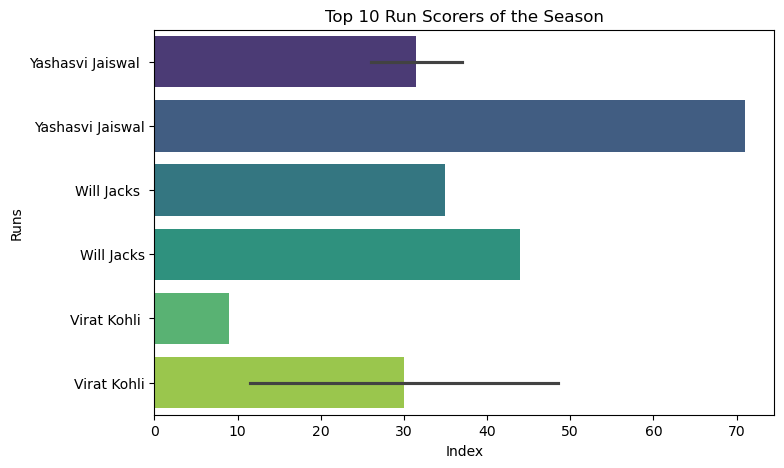

In [33]:
#Plot a bar chart of top 10 run-scorers of the season (from most_runs column).

top_scorers = df[['most_runs']].sort_values(by="most_runs", ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_scorers.index, y="most_runs", data=top_scorers, palette="viridis", hue = 'most_runs')

plt.title("Top 10 Run Scorers of the Season")
plt.xlabel("Index")
plt.ylabel("Runs")
plt.show()


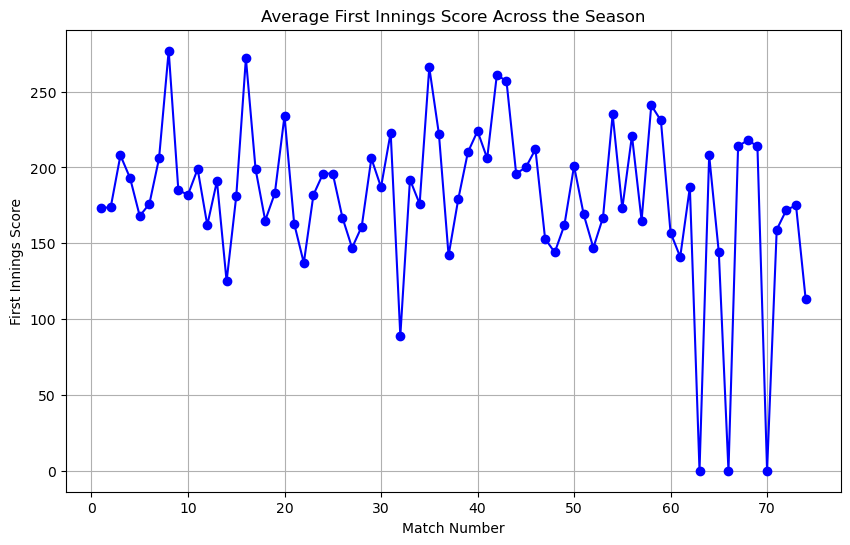

In [34]:
#Plot a line graph of average first innings score across the season (by match number).

df = df.reset_index()

plt.figure(figsize=(10,6))
plt.plot(df.index + 1, df['first_score'], marker='o', linestyle='-', color='blue')

plt.title("Average First Innings Score Across the Season")
plt.xlabel("Match Number")
plt.ylabel("First Innings Score")
plt.grid(True)
plt.show()


In [36]:
#Which bowler took the most wickets in a single match?

df['most_wkts'].value_counts().head(5)

most_wkts
T Natarajan         3
Jasprit Bumrah      3
Andre Russell       3
Mitchell Starc      3
Tushar Deshpande    2
Name: count, dtype: int64